**Data visualization - Assignment 1 - May 6, 2025**

Seaborn:

In [1]:
# load libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

# load data
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


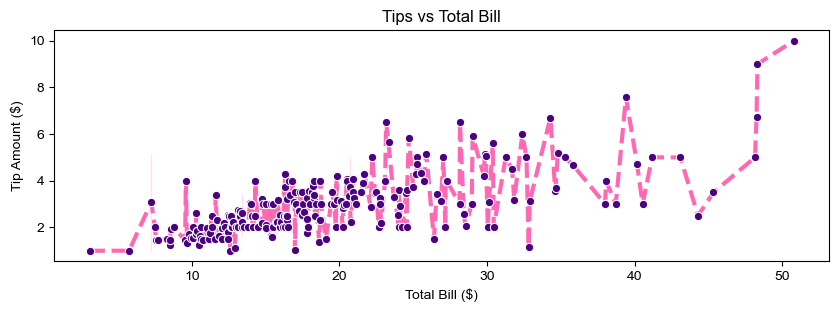

In [2]:
# create line plot with seaborn

# set figure size
fig = plt.subplots(figsize=(10,3))

# define plot and aesthetic elements
tipgraph = sns.lineplot(data = tips, # choose dataset
                        x = 'total_bill', # define x variable from dataset (col name)
                        y = 'tip', # define y var
                        color = 'hotpink',
                        linestyle = '--',
                        linewidth = 3,
                        marker = 'o',
                        markerfacecolor = 'indigo'
                        )


# add labels with .set() fx
tipgraph.set(title = 'Tips vs Total Bill',
             xlabel = 'Total Bill ($)',
             ylabel = 'Tip Amount ($)')

sns.set_style('darkgrid') # use pre-made styles

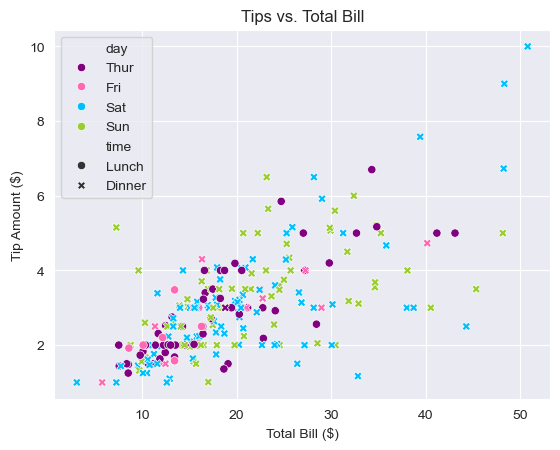

In [3]:
# multi-variable seaborn plot

# define plot
tipgraph = sns.scatterplot(data = tips,
                           x = 'total_bill',
                           y = 'tip',
                           style = 'time', # group marker style by time variable (lunch or dinner)
                           hue = 'day', # group color by day variable (thur-sun)
                           palette = ['purple', 'hotpink', 'deepskyblue', 'yellowgreen']) # set colors of hue

tipgraph.set(title = 'Tips vs. Total Bill',
             xlabel = 'Total Bill ($)',
             ylabel = 'Tip Amount ($)')

plt.show()

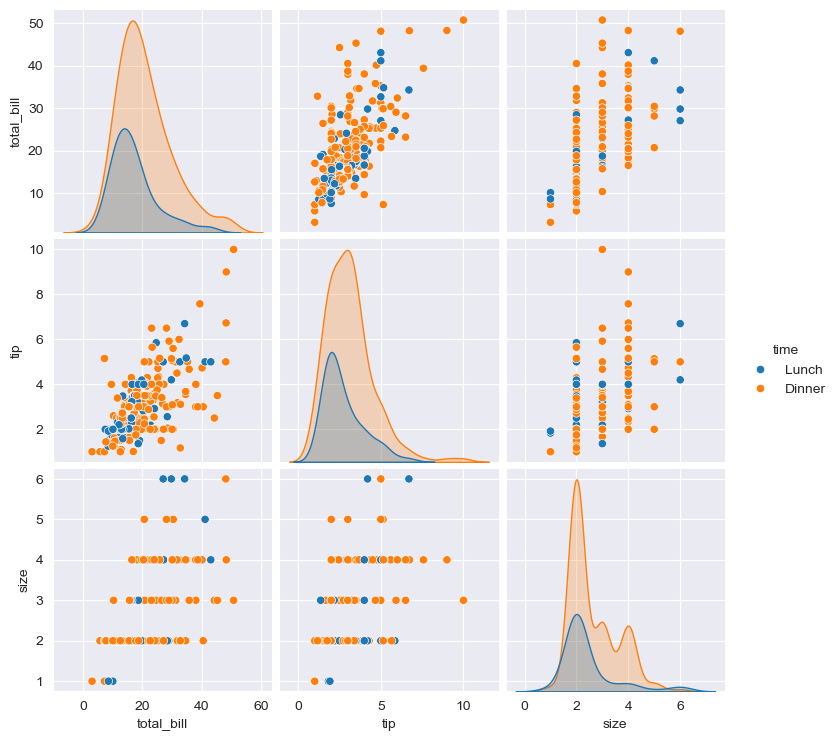

In [4]:
# comparing variables with pairplot in seaborn

sns.pairplot(data = tips, # comparing all numerical variables in dataset by pairs 
             hue = 'time' # group by specified categorical value
             )

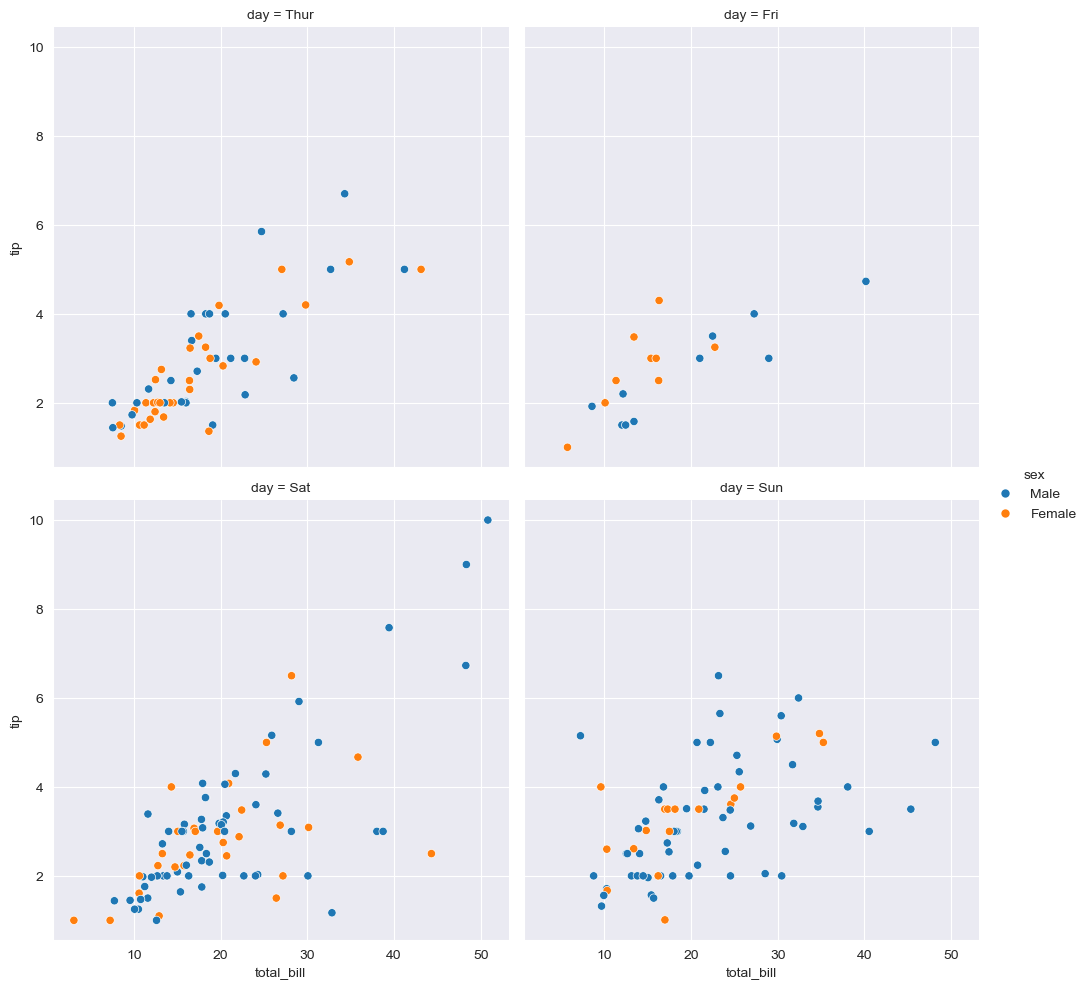

In [5]:
# explore specific levels within variables with relplot by seaborn

daysplot = sns.relplot(data = tips,
                       x = 'total_bill',
                       y = 'tip', 
                       hue = 'sex', # variable to group colors
                       col = 'day', # element to facet each graph
                       kind = 'scatter', # type of graph
                       col_wrap = 2 # num plots per col
                       )

Plotly:

In [6]:
# load library
import plotly.graph_objects as go

# sample data
x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 240, 99, 220])

In [7]:
# create plotly plot

# make figure
graph = go.Figure() 

# define plot type and data
graph.add_trace(go.Bar(x=x1, y=y1))

# update layout to include title and axis titles
graph.update_layout( 
    title = "Pirate Scores",
    xaxis_title = "Pirates",
    yaxis_title = "Score"
)

# show plot
graph.show() 

# export plotly graph as HTML files for embedding online
#graph.write_html("../../folders/pirategraph.html") 

In [8]:
# further plotly customizations

# make figure
graph = go.Figure()

# define scatter plot with custom marker
graph.add_trace(go.Scatter(x=x1, y= y1, mode = 'markers', # want points for scatter plot
                           marker = dict(
                               size = 15, 
                               color = 'hotpink',
                               opacity = 1,
                               line = dict(width = 5, color = 'purple') # point outline
                           )
                           ))

# update layout with titles and axis titles, size of layout
graph.update_layout(
    title = 'Interactive Pirate Plot',
    xaxis_title = 'Pirates',
    yaxis_title = 'Scores',
    width = 500, height = 500
)

Wordclouds:

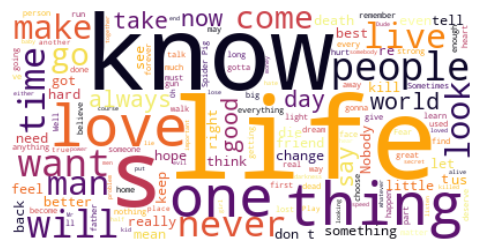

In [ ]:
# install library from shell
#%pip install wordcloud

# load library
from wordcloud import WordCloud

# load data
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",on_bad_lines='skip')
df

# join all our text from each row from our quote column into a string
text = " ".join(each for each in df.quote)

# generate our wordcloud image
wordcloud = WordCloud(background_color="white",colormap = 'inferno').generate(text)

# use matplotlib syntax to put our image in a figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud, 
          interpolation='bilinear') # this line helps smooth our image

ax.axis("off")

plt.show()

Venn diagrams:

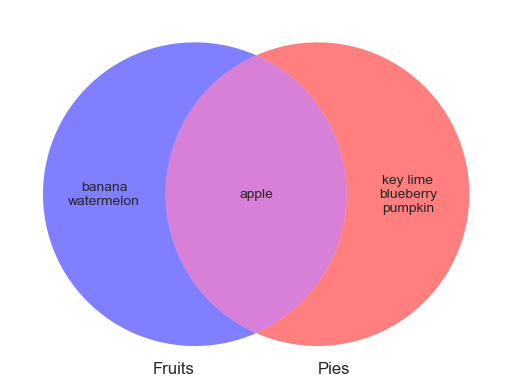

In [ ]:
# install library from shell
#%pip install matplotlib_venn

# load library
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

# sample data
A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

# define plot and aesthetics
diagram = venn2_unweighted([A, B], 
                           set_labels = ('Fruits', 'Pies'), 
                           set_colors=("blue", "red"), 
                           alpha=0.5 # set opacity/alpha channel
                           )

# set text labels inside venn diagram; id from documentation
diagram.get_label_by_id("10").set_text("\n".join(A - B)) # only in A
diagram.get_label_by_id("11").set_text("\n".join(A & B)) # in both A and B
diagram.get_label_by_id("01").set_text("\n".join(B - A)) # only in B

plt.show()